<a href="https://colab.research.google.com/github/kimwoonggon/SIIM-COVID19-KAGGLE/blob/main/(AugChange)(%EA%B9%80%EC%9B%85%EA%B3%A4)(TPU_Effnet_B6_or_B7_512)Covid19_StudyBaseLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#!pip install tensorflow~=2.2.0 tensorflow_gcs_config~=2.2.0
#!pip install -U tensorflow-addons==0.9.1
!pip install -U tensorflow-addons
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import requests
import os
resp = requests.post("http://{}:8475/requestversion/{}".format(os.environ["COLAB_TPU_ADDR"].split(":")[0], tf.__version__))
if resp.status_code != 200:
  print("Failed to switch the TPU to TF {}".format(version))

     |████████████████████████████████| 686kB 5.5MB/s 


In [3]:
!pip install -q efficientnet >> /dev/null

In [4]:
import random, re, math
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, tensorflow.keras.backend as K
!pip install gcsfs #gcp 파일 로드
#from kaggle_datasets import KaggleDatasets
from tensorflow.data.experimental import AUTOTUNE
from sklearn.metrics import accuracy_score


import operator
import gc
import pathlib
from scipy import spatial
import cv2
import functools

     |████████████████████████████████| 1.3MB 7.0MB/s 
     |████████████████████████████████| 122kB 32.1MB/s 
     |████████████████████████████████| 296kB 32.6MB/s 
     |████████████████████████████████| 143kB 35.5MB/s 


In [5]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

In [6]:
DEVICE = "TPU"
if DEVICE == "TPU":
    print("connecting to TPU...")
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        print("Could not connect to TPU")
        tpu = None

    if tpu:
        try:
            print("initializing  TPU ...")
            tf.config.experimental_connect_to_cluster(tpu)
            tf.tpu.experimental.initialize_tpu_system(tpu)
            strategy = tf.distribute.experimental.TPUStrategy(tpu)
            print("TPU initialized")
        except:
            print("failed to initialize TPU")
    else:
        DEVICE = "GPU"

if DEVICE != "TPU":
    print("Using default strategy for CPU and single GPU")
    strategy = tf.distribute.get_strategy()

if DEVICE == "GPU":
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
    

AUTO     = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

connecting to TPU...
Running on TPU  grpc://10.71.221.202:8470
initializing  TPU ...
INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


TPU initialized
REPLICAS: 8


In [7]:
MIXED_PRECISION = True
XLA_ACCELERATE = True
 
if MIXED_PRECISION:
    from tensorflow.keras.mixed_precision import experimental as mixed_precision
    if tpu: 
        policy = tf.keras.mixed_precision.experimental.Policy('mixed_bfloat16')
    else: 
        policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
    mixed_precision.set_policy(policy)
    print('Mixed precision enabled')
 
if XLA_ACCELERATE:
    tf.config.optimizer.set_jit(True)
    print('Accelerated Linear Algebra enabled')

Mixed precision enabled
Accelerated Linear Algebra enabled


In [26]:
class CFG:
    StudyOrTwoClasses = "study"
    WIDTH = 640
    HEIGHT = 640
    OBJ_WIDTH = 640
    OBJ_HEIGHT = 640
    MEAN = (0.485, 0.456, 0.406)
    STD = (0.229, 0.224, 0.225)
    CHANNELS = 3
    
    REPLICAS = 8
    EPOCHS = 20
    BATCH_SIZE = 8 * REPLICAS
    AUG_BATCH = BATCH_SIZE
    
    LEARNING_RATE = 9e-5 * REPLICAS
    
    NUMBER_OF_CLASSES = 4
    RANDAUG_NUM = 2
    RANDAUG_MAGNITUDE = 15
    N_FOLDS = 5
 
    NET = 7
    TTA_NUM = 4
    SEED = 100
    #GCS_PATH = 'gs://kds-516797a1df892145d5ba2988da2a0e9f80e2aa231cb6453e66962c14'
    GCS_PATH = 'gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e'
    ROOT_PATH = 'gdrive/My Drive/Colab Notebooks/KAGGLE_COVID19'


In [27]:
from sklearn.model_selection import train_test_split
import efficientnet.tfkeras as efn
import tensorflow.keras.applications as apl
# import EfficientNetB0
# Configuration
effnets = [efn.EfficientNetB0,efn.EfficientNetB1,efn.EfficientNetB2,efn.EfficientNetB3,efn.EfficientNetB4,efn.EfficientNetB5,efn.EfficientNetB6,efn.EfficientNetB7]
#effnets = [apl.EfficientNetB0,apl.EfficientNetB1,apl.EfficientNetB2,apl.EfficientNetB3,apl.EfficientNetB4,apl.EfficientNetB5,apl.EfficientNetB6,apl.EfficientNetB7]
TTA_NUM = CFG.TTA_NUM
TOTALWIDTH = CFG.WIDTH
TOTALHEIGHT = CFG.HEIGHT
HEIGHT = CFG.OBJ_HEIGHT
WIDTH = CFG.OBJ_WIDTH
IMAGE_SIZE = [HEIGHT, WIDTH]
NET = CFG.NET
BATCH_SIZE = CFG.BATCH_SIZE
AUG_BATCH = BATCH_SIZE
CHANNELS = CFG.CHANNELS
AUTO = tf.data.experimental.AUTOTUNE
 
GCS_PATH = CFG.GCS_PATH
ROOT_PATH = CFG.ROOT_PATH
EPOCHS = CFG.EPOCHS
SEED = CFG.SEED
LEARNING_RATE = CFG.LEARNING_RATE
NUMBER_OF_CLASSES = CFG.NUMBER_OF_CLASSES
 
#class_weight = CFG.CLASS_WEIGHT
 
IMAGE_MEAN = CFG.MEAN
IMAGE_STD = CFG.STD 
FILENAMES = tf.io.gfile.glob(CFG.GCS_PATH+f"/train*")
#TEST_FILENAMES = tf.io.gfile.glob(CFG.GCS_PATH+"/test*")
print(FILENAMES)
#print(TEST_FILENAMES)

['gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e/train_mask00-1267.tfrec', 'gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e/train_mask01-1267.tfrec', 'gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e/train_mask02-1267.tfrec', 'gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e/train_mask03-1267.tfrec', 'gs://kds-d01a8ccac2f40923bd1e45b9926e5dad01232e523339871333f1162e/train_mask04-1266.tfrec']


In [28]:
test_image = tf.cast(tf.random.uniform(shape=(1024,1024,3),minval = 0,maxval = 255,dtype=tf.int32), dtype=tf.uint8)
 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow_addons.image.utils import to_4D_image, from_4D_image 
import inspect
import math
#import tensorflow.compat.v1 as tf
#from tensorflow.contrib import image as contrib_image
#from tensorflow.contrib import training as contrib_training
def blend(image1, image2, factor):
  """Blend image1 and image2 using 'factor'.
  Factor can be above 0.0.  A value of 0.0 means only image1 is used.
  A value of 1.0 means only image2 is used.  A value between 0.0 and
  1.0 means we linearly interpolate the pixel values between the two
  images.  A value greater than 1.0 "extrapolates" the difference
  between the two pixel values, and we clip the results to values
  between 0 and 255.
  Args:
    image1: An image Tensor of type uint8.
    image2: An image Tensor of type uint8.
    factor: A floating point value above 0.0.
  Returns:
    A blended image Tensor of type uint8.
  """
  if factor == 0.0:
    return tf.convert_to_tensor(image1)
  if factor == 1.0:
    return tf.convert_to_tensor(image2)
 
  image1 = tf.cast(image1, dtype=tf.float32)
  image2 = tf.cast(image2, dtype=tf.float32)
 
  difference = image2 - image1
  scaled = factor * difference
 
  # Do addition in float.
  temp = tf.cast(image1, dtype=tf.float32) + scaled
 
  # Interpolate
  if factor > 0.0 and factor < 1.0:
    # Interpolation means we always stay within 0 and 255.
    return tf.cast(temp, tf.uint8)
 
  # Extrapolate:
  #
  # We need to clip and then cast.
  return tf.cast(tf.clip_by_value(temp, 0.0, 255.0), tf.uint8)
def Identity(image, _):
    return image
#Identity(test_image, 3)
def AutoContrast(image, _):
  """Implements Autocontrast function from PIL using TF ops.
  Args:
    image: A 3D uint8 tensor.
  Returns:
    The image after it has had autocontrast applied to it and will be of type
    uint8.
  """
 
  def scale_channel(image):
    """Scale the 2D image using the autocontrast rule."""
    # A possibly cheaper version can be done using cumsum/unique_with_counts
    # over the histogram values, rather than iterating over the entire image.
    # to compute mins and maxes.
    lo = tf.cast(tf.reduce_min(image), dtype = tf.float32)
    hi = tf.cast(tf.reduce_max(image), dtype = tf.float32)
 
    # Scale the image, making the lowest value 0 and the highest value 255.
    def scale_values(im):
        scale = 255.0 / (hi - lo)
        offset = -lo * scale
        im = tf.cast(im, dtype=tf.float32) * scale + offset
        im = tf.clip_by_value(im, 0.0, 255.0)
        return tf.cast(im, tf.uint8)
 
    result = tf.cond(hi > lo, lambda: scale_values(image), lambda: image)
    return result
 
  # Assumes RGB for now.  Scales each channel independently
  # and then stacks the result.
  s1 = scale_channel(image[:, :, 0])
  s2 = scale_channel(image[:, :, 1])
  s3 = scale_channel(image[:, :, 2])
  image = tf.stack([s1, s2, s3], 2)
  return image
 
AutoContrast(test_image, 3)
def Equalize(image, _):
  """Implements Equalize function from PIL using TF ops."""
  def scale_channel(im, c):
    """Scale the data in the channel to implement equalize."""
    im = tf.cast(im[:, :, c], tf.int32)
    # Compute the histogram of the image channel.
    histo = tf.histogram_fixed_width(im, [0, 255], nbins=256)
 
    # For the purposes of computing the step, filter out the nonzeros.
    nonzero = tf.where(tf.not_equal(histo, 0))
    nonzero_histo = tf.reshape(tf.gather(histo, nonzero), [-1])
    step = (tf.reduce_sum(nonzero_histo) - nonzero_histo[-1]) // 255
 
    def build_lut(histo, step):
      # Compute the cumulative sum, shifting by step // 2
      # and then normalization by step.
      lut = (tf.cumsum(histo) + (step // 2)) // step
      # Shift lut, prepending with 0.
      lut = tf.concat([[0], lut[:-1]], 0)
      # Clip the counts to be in range.  This is done
      # in the C code for image.point.
      return tf.clip_by_value(lut, 0, 255)
 
    # If step is zero, return the original image.  Otherwise, build
    # lut from the full histogram and step and then index from it.
    result = tf.cond(tf.equal(step, 0),
                     lambda: im,
                     lambda: tf.gather(build_lut(histo, step), im))
 
    return tf.cast(result, tf.uint8)
 
  # Assumes RGB for now.  Scales each channel independently
  # and then stacks the result.
  s1 = scale_channel(image, 0)
  s2 = scale_channel(image, 1)
  s3 = scale_channel(image, 2)
  image = tf.stack([s1, s2, s3], 2)
  return image
Equalize(test_image, 1)
def Rotate(image, degrees):
  """Rotates the image by degrees either clockwise or counterclockwise.
  Args:
    image: An image Tensor of type uint8.
    degrees: Float, a scalar angle in degrees to rotate all images by. If
      degrees is positive the image will be rotated clockwise otherwise it will
      be rotated counterclockwise.
    replace: A one or three value 1D tensor to fill empty pixels caused by
      the rotate operation.
  Returns:
    The rotated version of image.
  """
  # Convert from degrees to radians.
  degrees = int(degrees)
  degrees_to_radians = math.pi / 180.0
  radians = degrees * degrees_to_radians
 
  # In practice, we should randomize the rotation degrees by flipping
  # it negatively half the time, but that's done on 'degrees' outside
  # of the function.
  #image = contrib_image.rotate(wrap(image), radians)
  image = tfa.image.rotate(image, radians)
  #return unwrap(image, replace)
  return image
Rotate(test_image, 30.1)
def Solarize(image, threshold=128):
  # For each pixel in the image, select the pixel
  # if the value is less than the threshold.
  # Otherwise, subtract 255 from the pixel.
  #image = tf.convert_to_tensor(image, dtype=tf.int32)
  #print(image)
  
  threshold = tf.cast(threshold, dtype=tf.uint8)
  #print(threshold)
  minus_value = tf.constant(255, dtype=tf.uint8)
  #print(minus_value)
  return tf.where(image < threshold, image, minus_value - image)
Solarize(test_image, 10.0)
def Color(image, factor):
  """Equivalent of PIL Color."""
  degenerate = tf.image.grayscale_to_rgb(tf.image.rgb_to_grayscale(image))
  #factor = tf.cast(factor, dtype=tf.float32)
  return blend(degenerate, image, factor)
Color(test_image, 10.1)
 
 
 
def Posterize(image, bits):
 
  bits=int(bits)
  #print(bits)
  """Equivalent of PIL Posterize."""
  shift = 8 - bits
  #print(shift)
  #print(image)
  return tf.bitwise.left_shift(tf.bitwise.right_shift(image, shift), shift)
Posterize(test_image, 1.1)
def Contrast(image, factor):
  """Equivalent of PIL Contrast."""
  degenerate = tf.image.rgb_to_grayscale(image)
  # Cast before calling tf.histogram.
  degenerate = tf.cast(degenerate, tf.int32)
 
  # Compute the grayscale histogram, then compute the mean pixel value,
  # and create a constant image size of that value.  Use that as the
  # blending degenerate target of the original image.
  hist = tf.histogram_fixed_width(degenerate, [0, 255], nbins=256)
  mean = tf.reduce_sum(tf.cast(hist, tf.float32)) / 256.0
  degenerate = tf.ones_like(degenerate, dtype=tf.float32) * mean
  degenerate = tf.clip_by_value(degenerate, 0.0, 255.0)
  degenerate = tf.image.grayscale_to_rgb(tf.cast(degenerate, tf.uint8))
  return blend(degenerate, image, factor)
Contrast(test_image, 10.1)
def Brightness(image, factor):
  """Equivalent of PIL Brightness."""
  degenerate = tf.zeros_like(image)
  return blend(degenerate, image, factor)
Brightness(test_image, 10.1)
def _sharpness_image(image, factor):
    orig_image = image
    image_dtype = image.dtype
    image_channels = image.shape[-1]
    image = tf.cast(image, tf.float32)
 
    # SMOOTH PIL Kernel.
    kernel = (
        tf.constant(
            [[1, 1, 1], [1, 5, 1], [1, 1, 1]], dtype=tf.float32, shape=[3, 3, 1, 1]
        )
        / 13.0
    )
    kernel = tf.tile(kernel, [1, 1, image_channels, 1])
 
    # Apply kernel channel-wise.
    degenerate = tf.nn.depthwise_conv2d(
        image, kernel, strides=[1, 1, 1, 1], padding="VALID", dilations=[1, 1]
    )
    degenerate = tf.cast(degenerate, image_dtype)
 
    # For the borders of the resulting image, fill in the values of the original image.
    mask = tf.ones_like(degenerate)
    padded_mask = tf.pad(mask, [[0, 0], [1, 1], [1, 1], [0, 0]])
    padded_degenerate = tf.pad(degenerate, [[0, 0], [1, 1], [1, 1], [0, 0]])
    result = tf.where(tf.equal(padded_mask, 1), padded_degenerate, orig_image)
 
    # Blend the final result.
    blended = blend(result, orig_image, factor)
    return tf.cast(blended, image_dtype)
 
 
def Sharpness(image, factor):
    
        image_dims = tf.rank(image)
        image = to_4D_image(image)
        image = _sharpness_image(image, factor=factor)
        return from_4D_image(image, image_dims)
    #return tfa.image.sharpness(image, factor)
Sharpness(test_image, 10.1)
 
def ShearX(image, level):
  """Equivalent of PIL Shearing in X dimension."""
  # Shear parallel to x axis is a projective transform
  # with a matrix form of:
  # [1  level
  #  0  1].
  #image = contrib_image.transform(
  #    wrap(image), [1., level, 0., 0., 1., 0., 0., 0.])
  #return unwrap(image, replace)
  
  return tfa.image.shear_x(image, level, 0)
ShearX(test_image,10)
def ShearY(image, level):
  """Equivalent of PIL Shearing in Y dimension."""
  # Shear parallel to y axis is a projective transform
  # with a matrix form of:
  # [1  0
  #  level  1].
  #image = contrib_image.transform(
  #    wrap(image), [1., 0., 0., level, 1., 0., 0., 0.])
  #return unwrap(image, replace)
  return tfa.image.shear_y(image, level, 0)
ShearX(test_image,20)
def wrap(image):
  """Returns 'image' with an extra channel set to all 1s."""
  shape = tf.shape(image)
  extended_channel = tf.ones([shape[0], shape[1], 1], image.dtype)
  extended = tf.concat([image, extended_channel], 2)
  return extended
 
def unwrap(image, replace):
  """Unwraps an image produced by wrap.
  Where there is a 0 in the last channel for every spatial position,
  the rest of the three channels in that spatial dimension are grayed
  (set to 128).  Operations like translate and shear on a wrapped
  Tensor will leave 0s in empty locations.  Some transformations look
  at the intensity of values to do preprocessing, and we want these
  empty pixels to assume the 'average' value, rather than pure black.
  Args:
    image: A 3D Image Tensor with 4 channels.
    replace: A one or three value 1D tensor to fill empty pixels.
  Returns:
    image: A 3D image Tensor with 3 channels.
  """
  image_shape = tf.shape(image)
  # Flatten the spatial dimensions.
  flattened_image = tf.reshape(image, [-1, image_shape[2]])
 
  # Find all pixels where the last channel is zero.
  alpha_channel = flattened_image[:, 3]
 
  replace = tf.concat([replace, tf.ones([1], image.dtype)], 0)
 
  # Where they are zero, fill them in with 'replace'.
  flattened_image = tf.where(
      tf.equal(alpha_channel, 0),
      tf.ones_like(flattened_image, dtype=image.dtype) * replace,
      flattened_image)
 
  image = tf.reshape(flattened_image, image_shape)
  image = tf.slice(image, [0, 0, 0], [image_shape[0], image_shape[1], 3])
  return image
 
def TranslateX(image, pixels):
  """Equivalent of PIL Translate in X dimension."""
  #image = contrib_image.translate(wrap(image), [-pixels, 0])
  #return unwrap(image, replace)
  return tfa.image.translate_xy(image, [pixels, 0], replace=0)
TranslateX(test_image, 10)
def TranslateY(image, pixels):
  """Equivalent of PIL Translate in Y dimension."""
  #image = contrib_image.translate(wrap(image), [0, -pixels])
  #return unwrap(image, replace)
  return tfa.image.translate_xy(image, [0, pixels], replace=0)
TranslateY(test_image, 10)

<tf.Tensor: shape=(1024, 1024, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[231,  32, 185],
        [ 59, 122, 139],
        [ 17,  48, 253],
        ...,
        [ 72, 143,  46],
        [242, 166, 186],
        [170, 125,  86]],

       [[190,  23,  89],
        [232, 157,  82],
        [136, 238,  47],
        ...,
        [ 67, 107,  93],
        [126,  73, 109],
        [149,  92, 229]],

       [[180,  34, 170],
        [138,  99, 148],
        [ 38, 148, 218],
        ...,
        [ 51, 249, 

In [29]:
class RandomResizedCrop:
    """Torchvision's variant of crop a random part of the input and rescale it to some size.
    Args:
        height (int): height after crop and resize.
        width (int): width after crop and resize.
        scale ((float, float)): range of size of the origin size cropped
        ratio ((float, float)): range of aspect ratio of the origin aspect ratio cropped
        interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
            cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
            Default: cv2.INTER_LINEAR.
        p (float): probability of applying the transform. Default: 1.
    Targets:
        image, mask, bboxes, keypoints
    Image types:
        uint8, float32
    """

    def __init__(
        self,
        height,
        width,
        org_height,
        org_width,
        scale=(0.08, 1.0),
        ratio=(0.75, 1.3333333333333333),
    ):
        self.height = height
        self.width = width
        self.scale = scale
        self.ratio = ratio
        self.beforeheight = org_height
        self.beforewidth = org_width
    
    @staticmethod
    def get_random_crop_coords(height, width, crop_height, crop_width, h_start, w_start):
        x1 = int((height - crop_height) * h_start)
        x2 = x1 + crop_height
        y1 = int((width - crop_width) * w_start)
        y2 = y1 + crop_width
        return x1, y1, x2, y2
    
    def __call__(self, img):

        
        area = img.shape[0] * img.shape[1]
        #print(img.shape[0], img.shape[1])
        for _attempt in range(10):
            target_area = random.uniform(*self.scale) * area
            log_ratio = (math.log(self.ratio[0]), math.log(self.ratio[1]))
            aspect_ratio = math.exp(random.uniform(*log_ratio))

            w = int(round(math.sqrt(target_area * aspect_ratio)))  # skipcq: PTC-W0028
            h = int(round(math.sqrt(target_area / aspect_ratio)))  # skipcq: PTC-W0028
            #print(w, h)
            if 0 < w <= img.shape[1] and 0 < h <= img.shape[0]:
                i = random.randint(0, img.shape[0] - h)
                j = random.randint(0, img.shape[1] - w)
                h_start = i * 1.0 / (img.shape[0] - h + 1e-10)
                w_start = j * 1.0 / (img.shape[1] - w + 1e-10)
                #print(h, w)
                x1, y1, x2, y2 = self.get_random_crop_coords(self.beforeheight, self.beforewidth, h, w, h_start, w_start)
                #print(h, w)
                #print(x1, y1, x2, y2)
                #print(x1, y1, x2, y2)
                img = img[x1:x2, y1:y2, :]
                img = tf.image.resize(img, (self.height, self.width))
                return tf.cast(img, dtype=tf.uint8)

        # Fallback to central crop
        #print('central gogo')
        in_ratio = img.shape[1] / img.shape[0]
        if in_ratio < min(self.ratio):
            w = img.shape[1]
            h = int(round(w / min(self.ratio)))
        elif in_ratio > max(self.ratio):
            h = img.shape[0]
            w = int(round(h * max(self.ratio)))
        else:  # whole image
            w = img.shape[1]
            h = img.shape[0]
        i = (img.shape[0] - h) // 2
        j = (img.shape[1] - w) // 2
        x1, y1, x2, y2 = self.get_random_crop_coords(self.beforeheight, self.beforewidth, h, w, i, j)
        img = img[x1:x2, y1:y2, :]
        img = tf.image.resize(img, (self.height, self.width))
        return tf.cast(img, dtype=tf.uint8)

In [30]:
class Normalize:
    """Divide pixel values by 255 = 2**8 - 1, subtract mean per channel and divide by std per channel.
    Args:
        mean (float, list of float): mean values
        std  (float, list of float): std values
        max_pixel_value (float): maximum possible pixel value
    Targets:
        image
    Image types:
        uint8, float32
    """

    def __init__(
        self, mean=CFG.MEAN, std=CFG.STD, max_pixel_value=255.0, always_apply=False, p=1.0
    ):
        self.mean = mean
        self.std = std
        self.max_pixel_value = max_pixel_value


    
    def normalize_image(self, img, mean, std, max_pixel_value=255.0):
        mean = tf.convert_to_tensor(mean, dtype=tf.float32)
        mean = mean * max_pixel_value

        std = tf.convert_to_tensor(std, dtype=tf.float32)
        std = std * max_pixel_value

        denominator = tf.math.reciprocal(std)

        #print('before cast', img)
        img = tf.cast(img, dtype = tf.float32)
        #print('after cast', img)
        #img = img - mean
        #img = img * denominator
        img = img / 255.
        return img

    def __call__(self, img):
        return self.normalize_image(img, self.mean, self.std)

In [71]:
import random
class CoarseDropout:
  def __init__(self, max_holes, size=0.06):
    self.size = size
    self.max_holes = max_holes


  def __call__(self, image):
      #holes = []
      P = random.uniform(0,1)
      #P = tf.random.uniform([],0,1,dtype=tf.float32)
      height = image.shape[0]
      width = image.shape[1]
      for _n in range(self.max_holes):
          hole_height = height * self.size * P
          hole_width = width * self.size * P
          hole_height = int(hole_height)
          hole_width = int(hole_width)
          y1 = random.randint(0, int(height - hole_height))
          #y1 = tf.random.uniform(0, height - hole_height, dtype=tf.int32)
          x1 = random.randint(0, int(width- hole_width))
          y2 = y1 + hole_height
          x2 = x1 + hole_width
          #holes.append((y1, x1, y2, x2))
        
          one = image[y1:y2,0:x1,:]
          two = tf.zeros([y2-y1,x2-x1,3], dtype=tf.float32) 
          three = image[y1:y2,x2:width,:]
          middle = tf.concat([one,two,three],axis=1)
          image = tf.concat([image[0:y1,:,:],middle,image[y2:height,:,:]],axis=0)
      
          
      image = tf.cast(image, dtype=tf.float32)
      return image

In [72]:
def augment_list():
 
  l = [  #(Identity, 0, 1),
        #(AutoContrast, 0, 1),
        #(Equalize, 0, 1),
        (Rotate, -20, 20),
        #(Posterize, 0, 4),
        #(Solarize, 0, 256),
        #(Color, 0.1, 1.9),
        (Contrast, 0.1, 1.9),
        (Brightness, 0.1, 1.9),
        #(Sharpness, 0.1, 1.9),
        (ShearX, -0.1, 0.1),
        (ShearY, -0.1, 0.1),
        (TranslateX, -CFG.OBJ_WIDTH * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE, CFG.OBJ_WIDTH * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE),
        (TranslateY, -CFG.OBJ_HEIGHT * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE, CFG.OBJ_HEIGHT * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE),
    ]
  return l

In [73]:
def augment_list_tta():
 
  l = [  #(Identity, 0, 1),
        #(AutoContrast, 0, 1),
        #(Equalize, 0, 1),
        #(Rotate, -15, 15),
        #(Posterize, 0, 4),
        #(Solarize, 0, 256),
        #(Color, 0.1, 1.9),
        #(Contrast, 0.1, 1.9),
        (Brightness, 0.1, 1.9),
        #(Sharpness, 0.1, 1.9),
        #(ShearX, -0.1, 0.1),
        #(ShearY, -0.1, 0.1),
        #(TranslateX, -CFG.OBJ_WIDTH * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE, CFG.OBJ_WIDTH * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE),
        #(TranslateY, -CFG.OBJ_HEIGHT * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE, CFG.OBJ_HEIGHT * 0.0625 * 30 / CFG.RANDAUG_MAGNITUDE),
    ]
  return l

In [74]:
import random
class RandAugment:
    def __init__(self, n, m):
        self.n = n
        self.m = m      # [0, 30]
        self.augment_list = augment_list()
 
    def __call__(self, img):
        ops = random.choices(self.augment_list, k=self.n)
        for op, minval, maxval in ops:
            val = (float(self.m) / 30) * float(maxval - minval) + minval
            img = op(img, val)
 
 
        return img

In [75]:
import random
class RandAugmentTTA:
    def __init__(self, n, m):
        self.n = n
        self.m = m      # [0, 30]
        self.augment_list = augment_list_tta()
 
    def __call__(self, img):
        ops = random.choices(self.augment_list, k=self.n)
        for op, minval, maxval in ops:
            val = (float(self.m) / 30) * float(maxval - minval) + minval
            img = op(img, val)
 
 
        return img

In [76]:
randomaugtta = RandAugmentTTA(CFG.RANDAUG_NUM,CFG.RANDAUG_MAGNITUDE)
randaugtta = RandAugmentTTA(CFG.RANDAUG_NUM,CFG.RANDAUG_MAGNITUDE)

In [92]:
def cutmix(image, label, PROBABILITY = 1.0):
    # input image - is a batch of images of size [n,dim,dim,3] not a single image of [dim,dim,3]
    # output - a batch of images with cutmix applied
    #print(image.shape, label.shape)
    DIM1 = CFG.OBJ_HEIGHT
    DIM2 = CFG.OBJ_WIDTH
    CLASSES = CFG.NUMBER_OF_CLASSES
    AUG_BATCH = CFG.BATCH_SIZE
    cutmix_start = 0.0
    imgs = []; labs = []
    
    image = tf.image.resize(image, size=(DIM1, DIM2))
    image = tf.cast(image, dtype=tf.float32)
    for j in range(AUG_BATCH):
        # DO CUTMIX WITH PROBABILITY DEFINED ABOVE
        P = tf.cast( tf.random.uniform([],cutmix_start,1)<=PROBABILITY, tf.int32)
        # CHOOSE RANDOM IMAGE TO CUTMIX WITH
        k = tf.cast( tf.random.uniform([],0,AUG_BATCH),tf.int32)
        # CHOOSE RANDOM LOCATION
        x = tf.cast( tf.random.uniform([],0,DIM2),tf.int32)
        y = tf.cast( tf.random.uniform([],0,DIM1),tf.int32)
        a = tf.cast(np.random.beta(0.3,0.3), dtype=tf.float32)
        b = tf.cast(np.random.beta(0.3,0.3), dtype=tf.float32) # this is beta dist with alpha=1.0
        WIDTH = tf.cast( DIM2 * tf.math.sqrt(1-a),tf.int32) * P
        HEIGHT = tf.cast( DIM1 * tf.math.sqrt(1-b), tf.int32) * P
        ya = tf.math.maximum(0,y-HEIGHT//2)
        yb = tf.math.minimum(DIM1,y+HEIGHT//2)
        xa = tf.math.maximum(0,x-WIDTH//2)
        xb = tf.math.minimum(DIM2,x+WIDTH//2)
        # MAKE CUTMIX IMAGE
        one = image[j,ya:yb,0:xa,:]
        two = image[k,ya:yb,xa:xb,:]
        three = image[j,ya:yb,xb:DIM2,:]
        middle = tf.concat([one,two,three],axis=1)
        cutmix_img = tf.concat([image[j,0:ya,:,:],middle,image[j,yb:DIM1,:,:]],axis=0)
        p_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
        p_v_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
        p_transpose = tf.random.uniform([], 0, 1, dtype=tf.float32)
        if p_flip > 0.5:
            cutmix_img = tf.image.flip_left_right(cutmix_img)
        if p_v_flip > 0.5:
            cutmix_img = tf.image.flip_up_down(cutmix_img)
        if p_transpose > 0.5:
            cutmix_img = tf.image.transpose(cutmix_img)
        #cutmix_img = Normalize(CFG.MEAN, CFG.STD)(cutmix_img)
        #cutmix_img = tf.image.resize(cutmix_img, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
        #mixup_image = (1-a)*img1 + a*img2
        cutmix_img = Normalize(CFG.MEAN, CFG.STD)(cutmix_img)
        #mixup_image = tf.image.resize(mixup_image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
        #imgs.append(mixup_image)
        imgs.append(cutmix_img)
        # MAKE CUTMIX LABEL
        a = tf.cast(WIDTH*HEIGHT/DIM1/DIM2,tf.float32)
        if len(label.shape)==1:
            lab1 = tf.one_hot(label[j],CLASSES)
            lab2 = tf.one_hot(label[k],CLASSES)
        else:
            lab1 = label[j,]
            lab2 = label[k,]
        labs.append((1-a)*lab1 + a*lab2)
            
    # RESHAPE HACK SO TPU COMPILER KNOWS SHAPE OF OUTPUT TENSOR (maybe use Python typing instead?)
    image2 = tf.reshape(tf.stack(imgs),(AUG_BATCH,CFG.OBJ_HEIGHT,CFG.OBJ_WIDTH,3))
    label2 = tf.reshape(tf.stack(labs),(AUG_BATCH,CLASSES))
    return image2,label2
 
 
 
def mixup(image, label, PROBABILITY = 1.0):
    # input image - is a batch of images of size [n,dim,dim,3] not a single image of [dim,dim,3]
    # output - a batch of images with mixup applied
    AUG_BATCH = CFG.BATCH_SIZE
    DIM1 = CFG.OBJ_HEIGHT
    DIM2 = CFG.OBJ_WIDTH
    CLASSES = CFG.NUMBER_OF_CLASSES
    
    imgs = []; labs = []
    image = tf.image.resize(image, size=(DIM1, DIM2))
    image = tf.cast(image, dtype=tf.float32)
    for j in range(AUG_BATCH):
        # DO MIXUP WITH PROBABILITY DEFINED ABOVE
        P = tf.cast( tf.random.uniform([],0,1)<=PROBABILITY, tf.float32)
        # CHOOSE RANDOM
        k = tf.cast( tf.random.uniform([],0,AUG_BATCH),tf.int32)
        a = tf.cast(np.random.beta(0.3,0.3), dtype=tf.float32)*P # this is beta dist with alpha=1.0
        # MAKE MIXUP IMAGE
        img1 = image[j,]
        img2 = image[k,]
        #mixup_image = (1-0.5)*img1 + 0.5*img2
        mixup_image = (1-a)*img1 + a*img2
        p_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
        #p_v_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
        #p_transpose = tf.random.uniform([], 0, 1, dtype=tf.float32)
        if p_flip > 0.5:
            mixup_image = tf.image.flip_left_right(mixup_image)
        #if p_v_flip > 0.5:
        #    mixup_image = tf.image.flip_up_down(mixup_image)
        #if p_transpose > 0.5:
        #    mixup_image = tf.image.transpose(mixup_image)
        #mixup_image = Normalize(CFG.MEAN, CFG.STD)(mixup_image)
        mixup_image = tf.image.resize(mixup_image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
        mixup_image = tf.cast(mixup_image, tf.float32) / 255.
        imgs.append(mixup_image)
        # MAKE CUTMIX LABEL
        if len(label.shape)==1:
            lab1 = tf.one_hot(label[j],CLASSES)
            lab2 = tf.one_hot(label[k],CLASSES)
        else:
            lab1 = label[j,]
            lab2 = label[k,]
        labs.append((1-a)*lab1 + a*lab2)
            
    # RESHAPE HACK SO TPU COMPILER KNOWS SHAPE OF OUTPUT TENSOR (maybe use Python typing instead?)
    image2 = tf.reshape(tf.stack(imgs),(AUG_BATCH,CFG.OBJ_HEIGHT,CFG.OBJ_WIDTH,3))
    label2 = tf.reshape(tf.stack(labs),(AUG_BATCH,CLASSES))
    return image2,label2

In [78]:
tf.random.uniform([],-20,20, dtype=tf.int64)

<tf.Tensor: shape=(), dtype=int64, numpy=-10>

In [26]:
k = tf.random.uniform(shape=(512,512,3), dtype=tf.float32)

In [27]:
k

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.8541585 , 0.57851183, 0.92223454],
        [0.5818758 , 0.59709287, 0.01784706],
        [0.54157674, 0.85238755, 0.70945835],
        ...,
        [0.8428328 , 0.43469965, 0.850845  ],
        [0.82915413, 0.79550064, 0.82302976],
        [0.34965312, 0.4297377 , 0.7257067 ]],

       [[0.8382602 , 0.18235648, 0.12272644],
        [0.15239501, 0.4662509 , 0.968613  ],
        [0.4197272 , 0.42604613, 0.19278502],
        ...,
        [0.8067471 , 0.8813101 , 0.3960415 ],
        [0.81193304, 0.611253  , 0.6166713 ],
        [0.9726392 , 0.01045895, 0.41549194]],

       [[0.99763477, 0.21306121, 0.51657486],
        [0.06848788, 0.08644986, 0.51546514],
        [0.17265272, 0.9068004 , 0.04874384],
        ...,
        [0.00814831, 0.26197052, 0.7365333 ],
        [0.45034516, 0.46995497, 0.127779  ],
        [0.31644797, 0.39114308, 0.37444913]],

       ...,

       [[0.9200218 , 0.4663986 , 0.17770922],
        [0.99

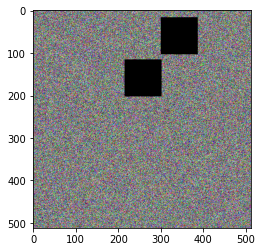

In [34]:
coarse = CoarseDropout(2, 0.32)

plt.imshow(coarse(k))

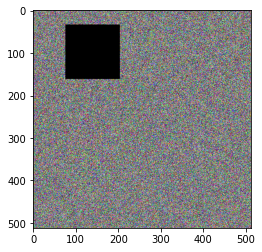

In [188]:
#cutout_degree = tf.random.uniform([],32,128, dtype=tf.int32)
for _ in range(10):
    cut_degree_range = tf.range(96,128,2)
    cut_idx = tf.random.uniform([],0,10, dtype=tf.int32)
    cutout_degree = cut_degree_range[cut_idx]
    k = tf.random.uniform(shape=(32,512,512,3))
    k =tfa.image.random_cutout(k, (128,128))
    plt.imshow(k[10])

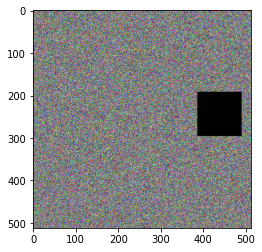

In [169]:
import matplotlib.pyplot as plt
plt.imshow(k[10])

In [155]:
tf.convert_to_tensor((96,96))[0]

<tf.Tensor: shape=(), dtype=int32, numpy=96>

In [93]:
def real_data_augment(image, label):
    k = tf.random.uniform([], 0, 1, dtype=tf.float32)
    if k < 0.5:
        image2, label2 = mixup(image, label)
    #elif (k >= -2) and (k < 0):
    #    image2, label2 = cutmix(image, label)
    else:
        image2, label2 = train_aug_gogo(image, label)
 
    return image2, label2 
 
def prep_for_val(image, label):
    
    DIM1 = CFG.OBJ_HEIGHT
    DIM2 = CFG.OBJ_WIDTH
    CLASSES = CFG.NUMBER_OF_CLASSES
    AUG_BATCH = CFG.AUG_BATCH
    imgs = []; labs = []
    #randaug = RandAugment(CFG.RANDAUG_NUM,CFG.RANDAUG_MAGNITUDE)
    #randaug = RandAugment(3, 12)
    normalize = Normalize(CFG.MEAN, CFG.STD)
    #coarse = CoarseDropout(30)
    #randomcrop = RandomResizedCrop(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, CFG.HEIGHT, CFG.WIDTH, scale=(0.85, 1.0))
 
    #P_NORMAL_OR_MIX = tf.random.uniform([],0,1,dtype=tf.float32)
 
 
    for j in range(AUG_BATCH):        
            img = image[j,:,:,:]
 
            img = tf.image.resize(img, [DIM1, DIM2])
            img = normalize(img)
            imgs.append(img)
 
       
            lab1 = label[j,]
            labs.append(lab1)
 
    image2 = tf.reshape(tf.stack(imgs),[AUG_BATCH, DIM1,DIM2,3])
    label2 = tf.reshape(tf.stack(labs),(AUG_BATCH,CLASSES))
 
    return image2,label2
 
 
def data_augment(image, label):
 
 
    DIM1 = CFG.OBJ_HEIGHT
    DIM2 = CFG.OBJ_WIDTH
    CLASSES = CFG.NUMBER_OF_CLASSES
    AUG_BATCH = CFG.AUG_BATCH
    imgs = []; labs = []
    randaug = RandAugment(CFG.RANDAUG_NUM,CFG.RANDAUG_MAGNITUDE)
    #randaug = RandAugment(3, 12)
    normalize = Normalize(CFG.MEAN, CFG.STD)
    coarse = CoarseDropout(1)
    randomcrop = RandomResizedCrop(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, CFG.HEIGHT, CFG.WIDTH, scale=(0.9, 1.1))
 
    P_NORMAL_OR_MIX = tf.random.uniform([],0,1,dtype=tf.float32)
 
 
    for j in range(AUG_BATCH):        
            img = image[j,:,:,:]
 
            p_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
            p_v_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
            p_transpose = tf.random.uniform([], 0, 1, dtype=tf.float32)
 
            img = randomcrop(img)
 
            if p_flip >= 0.5:
                img = tf.image.flip_left_right(img)
            if p_v_flip >= 0.5:
                img = tf.image.flip_up_down(img)
            #if p_transpose >= 0.5:
            #    if CFG.OBJ_HEIGHT == CFG.OBJ_WIDTH:
            #        img = tf.image.transpose(img)
 
            img = coarse(img)
            img = randaug(img)
            #img = img/255.
            img = tf.cast(img, tf.float32) / 255.
            imgs.append(img)
 
       
            lab1 = label[j,]
            labs.append(lab1)
 
    image2 = tf.reshape(tf.stack(imgs),[AUG_BATCH, DIM1,DIM2,3])
    label2 = tf.reshape(tf.stack(labs),(AUG_BATCH,CLASSES))
 
    return image2,label2

def train_aug_gogo(image, label):
 
 
    DIM1 = CFG.OBJ_HEIGHT
    DIM2 = CFG.OBJ_WIDTH
    CLASSES = CFG.NUMBER_OF_CLASSES
    AUG_BATCH = CFG.AUG_BATCH
    imgs = []; labs = []
    randaug = RandAugment(CFG.RANDAUG_NUM,CFG.RANDAUG_MAGNITUDE)
    #randaug = RandAugment(3, 12)
    normalize = Normalize(CFG.MEAN, CFG.STD)
    coarse = CoarseDropout(2, 0.32)
    randomcrop = RandomResizedCrop(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, CFG.HEIGHT, CFG.WIDTH, scale=(0.9, 1.33))
 
    P_NORMAL_OR_MIX = tf.random.uniform([],0,1,dtype=tf.float32)
 
 
    for j in range(AUG_BATCH):        
            img = image[j,:,:,:]
 
            p_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
            p_v_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
            rotate_degree = tf.random.uniform([],-20,20, dtype=tf.float32)
            cutout_degree1 = tf.random.uniform([],96,192, dtype=tf.int32)
            cutout_degree2 = tf.random.uniform([],96,192, dtype=tf.int32)

            img = randomcrop(img)
            img = tf.cast(img, tf.float32) / 255.
            
            if p_flip >= 0.5:
                img = tf.image.flip_left_right(img)
            if p_v_flip >= 1.2:
                img = tf.image.flip_up_down(img)
            img = tfa.image.rotate(img, rotate_degree)
            img = tf.image.random_brightness(img, 0.2)
            img = tf.image.random_saturation(img, 0.05,0.2)
            img = coarse(img)
            #img = tfa.image.random_cutout(img, tf.Variable((cutout_degree,cutout_degree), dtype=tf.int32))
            imgs.append(img)
            lab1 = label[j,]
            labs.append(lab1)
 
    image2 = tf.reshape(tf.stack(imgs),[AUG_BATCH, DIM1,DIM2,3])
    label2 = tf.reshape(tf.stack(labs),(AUG_BATCH,CLASSES))
 
    return image2,label2

In [94]:
import gc
gc.collect()

36646

In [95]:
def decode_tr_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    
    image = tf.reshape(image, [CFG.HEIGHT, CFG.WIDTH, 3])
    
    return image
 
def decode_val_image(image_data, label):
    """
        1. Decode a JPEG-encoded image to a uint8 tensor.
        2. Cast tensor to float and normalizes (range between 0 and 1).
        3. Resize and reshape images to the expected size.
    """
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.reshape(image, [CFG.HEIGHT, CFG.WIDTH, 3])
    image = tf.image.resize(image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
    normalize = Normalize(CFG.MEAN, CFG.STD)
    #image = normalize(image)
    image = tf.cast(image, tf.float32) / 255.
    
    image = tf.reshape(image, [CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, 3])
    label = tf.reshape(label, [CFG.NUMBER_OF_CLASSES])
    return image, label

def decode_test_image(image_data, label):
    """
        1. Decode a JPEG-encoded image to a uint8 tensor.
        2. Cast tensor to float and normalizes (range between 0 and 1).
        3. Resize and reshape images to the expected size.
    """
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.reshape(image, [CFG.HEIGHT, CFG.WIDTH, 3])
    image = tf.image.resize(image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
    normalize = Normalize(CFG.MEAN, CFG.STD)
    image = normalize(image)
    #image = tf.cast(image, tf.float32) / 255.
    
    image = tf.reshape(image, [CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, 3])
    return image, label

def decode_just_test_image(image_data):
    """
        1. Decode a JPEG-encoded image to a uint8 tensor.
        2. Cast tensor to float and normalizes (range between 0 and 1).
        3. Resize and reshape images to the expected size.
    """
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.reshape(image, [CFG.HEIGHT, CFG.WIDTH, 3])
    image = tf.image.resize(image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
    normalize = Normalize(CFG.MEAN, CFG.STD)
    image = normalize(image)
    #image = tf.cast(image, tf.float32) / 255.
    
    image = tf.reshape(image, [CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, 3])
    return image
 
def decode_val_image_for_tta(image_data):
    """
        1. Decode a JPEG-encoded image to a uint8 tensor.
        2. Cast tensor to float and normalizes (range between 0 and 1).
        3. Resize and reshape images to the expected size.
    """
    randomcrop = RandomResizedCrop(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, CFG.HEIGHT, CFG.WIDTH, scale=(0.99,1.0))
    randaug = RandAugmentTTA(3, 12)
    normalize = Normalize(CFG.MEAN, CFG.STD)
    p_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
    p_v_flip = tf.random.uniform([], 0, 1, dtype=tf.float32)
    #p_transpose = tf.random.uniform([], 0, 1, dtype=tf.float32)
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.reshape(image, [CFG.HEIGHT, CFG.WIDTH, 3])
    image = tf.image.resize(image, size=(CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH))
    #image = randomcrop(image)
    if p_flip > 0.5:
        image = tf.image.flip_left_right(image)
    if p_v_flip > 0.5:
        image = tf.image.flip_up_down(image)
    #if CFG.OBJ_HEIGHT == CFG.OBJ_WIDTH:
    #    if p_transpose > 0.5:
    #        image = tf.image.transpose(image)
    image = randaugtta(image)
    #image = normalize(image)
    image = tf.cast(image, tf.float32) / 255.
    image = tf.reshape(image, [CFG.OBJ_HEIGHT, CFG.OBJ_WIDTH, 3])
    return image
 
def read_tfrecord(example, labeled=True):
    """
        1. Parse data based on the 'TFREC_FORMAT' map.
        2. Decode image.
        3. If 'labeled' returns (image, label) if not (image, name).
    """
    if labeled:
        TFREC_FORMAT = {
            'image': tf.io.FixedLenFeature([], tf.string), 
            'target': tf.io.FixedLenFeature([], tf.int64), 
        }
        example = tf.io.parse_single_example(example, TFREC_FORMAT)
        return example['image'], tf.one_hot(example['target'], depth=CFG.NUMBER_OF_CLASSES)
    else:
        TFREC_FORMAT = {
            'image': tf.io.FixedLenFeature([], tf.string), 
            'image_id': tf.io.FixedLenFeature([], tf.string), 
        }
        example = tf.io.parse_single_example(example, TFREC_FORMAT)
        return example['image'], example['image_id']

def read_test_tfrecord(example):

        TFREC_FORMAT = {
            'image': tf.io.FixedLenFeature([], tf.string), 
            'image_id': tf.io.FixedLenFeature([], tf.string), 
        }
        example = tf.io.parse_single_example(example, TFREC_FORMAT)
        return example['image'], example['image_id']

def read_test_image_tfrecord(example):

        TFREC_FORMAT = {
            'image': tf.io.FixedLenFeature([], tf.string), 
            'image_id': tf.io.FixedLenFeature([], tf.string), 
        }
        example = tf.io.parse_single_example(example, TFREC_FORMAT)
        return example['image']
 
def load_dataset(filenames, validation, labeled=True, ordered=False, ):
    """
        Create a Tensorflow dataset from TFRecords.
    """
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False
 
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
    dataset = dataset.with_options(ignore_order)
    if validation == False:
 
        dataset = dataset.map(lambda x: read_tfrecord(x, labeled=labeled, validation = False), num_parallel_calls=AUTO)
    else:
        dataset = dataset.map(lambda x: read_tfrecord(x, labeled=labeled, validation = True), num_parallel_calls=AUTO)
    return dataset
 
def get_dataset(FILENAMES, labeled=True, ordered=False, repeated=False, augment=False, validation=False):
    """
        Return a Tensorflow dataset ready for training or inference.
    """
    dataset = tf.data.TFRecordDataset(FILENAMES, num_parallel_reads = AUTO)
    dataset = dataset.cache()
    if repeated:
        dataset = dataset.repeat()
    
    if not ordered:
        dataset = dataset.shuffle(1024*8)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        dataset = dataset.with_options(opt)
    
    if (labeled == True):
        dataset = dataset.map(lambda example : read_tfrecord(example, labeled=True), num_parallel_calls = AUTO)
    else:
        dataset = dataset.map(lambda example : read_tfrecord(example, labeled=False), num_parallel_calls = AUTO)
    
    if (validation == True) and (labeled == False):
        pass
    elif (validation == False) and (labeled == True):
        dataset = dataset.map(lambda image, label : (decode_tr_image(image), label), num_parallel_calls = AUTO)
    else:
        dataset = dataset.map(lambda image, label : decode_val_image(image, label), num_parallel_calls = AUTO)
    dataset = dataset.batch(BATCH_SIZE)
    
    
    
    if augment:
            #dataset = dataset.map(real_data_augment, num_parallel_calls=AUTO)
            dataset = dataset.map(real_data_augment, num_parallel_calls=AUTO)
    #else:
    #        dataset = dataset.map(prep_for_val, num_parallel_calls=AUTO)
    
    dataset = dataset.prefetch(AUTO)
    return dataset
 
def get_test_dataset(FILENAMES, return_image_name=False):
    """
        Return a Tensorflow dataset ready for training or inference.
    """
    dataset = tf.data.TFRecordDataset(FILENAMES, num_parallel_reads = AUTO)
    dataset = dataset.cache()   
    
    
    if return_image_name:
        dataset = dataset.map(lambda example : read_test_tfrecord(example), num_parallel_calls = AUTO)
        dataset = dataset.map(lambda image, label : decode_test_image(image, label), num_parallel_calls = AUTO)
    else:
        dataset = dataset.map(lambda example : read_test_image_tfrecord(example), num_parallel_calls = AUTO)
        dataset = dataset.map(lambda image : decode_just_test_image(image), num_parallel_calls = AUTO)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset
 
def get_dataset_for_tta(FILENAMES, labeled=True, ordered=False, repeated=False, augment=False, validation=False):
    """
        Return a Tensorflow dataset ready for training or inference.
    """
    dataset = tf.data.TFRecordDataset(FILENAMES, num_parallel_reads = AUTO)
    dataset = dataset.cache()
    if repeated:
        dataset = dataset.repeat()
    
    if not ordered:
        dataset = dataset.shuffle(1024*8)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        dataset = dataset.with_options(opt)
    
    if (labeled == True):
        dataset = dataset.map(lambda example : read_tfrecord(example, labeled=True), num_parallel_calls = AUTO)
    else:
        dataset = dataset.map(lambda example : read_tfrecord(example, labeled=False), num_parallel_calls = AUTO)
    
    if validation == False:
        dataset = dataset.map(lambda image, label : (decode_tr_image(image), label), num_parallel_calls = AUTO)
    else:
        dataset = dataset.map(lambda image, label : (decode_val_image_for_tta(image), label), num_parallel_calls = AUTO)
    dataset = dataset.batch(BATCH_SIZE)
    
    
    
    if augment:
            dataset = dataset.map(real_data_augment, num_parallel_calls=AUTO)
    
    dataset = dataset.prefetch(AUTO)
    return dataset

In [96]:
def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    print(n)
    return np.sum(n)

In [97]:
from tensorflow_addons.utils.types import FloatTensorLike
 
from typing import Union, Callable, Dict
from typeguard import typechecked
 
 
class CosineDecayRAdam(tfa.optimizers.RectifiedAdam):
    def _resource_apply_dense(self, grad, var):
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype)
        wd_t = self._decayed_wd(var_dtype)
        m = self.get_slot(var, "m")
        v = self.get_slot(var, "v")
        beta_1_t = self._get_hyper("beta_1", var_dtype)
        beta_2_t = self._get_hyper("beta_2", var_dtype)
        epsilon_t = tf.convert_to_tensor(self.epsilon, var_dtype)
        local_step = tf.cast(self.iterations + 1, var_dtype)
        beta_1_power = tf.pow(beta_1_t, local_step)
        beta_2_power = tf.pow(beta_2_t, local_step)
 
        if self._initial_total_steps > 0:
            total_steps = self._get_hyper("total_steps", var_dtype)
            warmup_steps = total_steps * self._get_hyper("warmup_proportion", var_dtype)
            min_lr = self._get_hyper("min_lr", var_dtype)
            decay_steps = tf.maximum(total_steps - warmup_steps, 1)
            decay_rate = (min_lr - lr_t) / decay_steps
            pi = tf.constant(3.141592)
            cos = tf.math.cos(pi * ((local_step - warmup_steps) / (total_steps - warmup_steps))) + tf.constant(1.)
            lr_t = tf.where(
                local_step <= warmup_steps,
                lr_t * (local_step / warmup_steps),
                #lr_t + decay_rate * tf.minimum(local_step - warmup_steps, decay_steps),
                min_lr + (lr_t - min_lr) / 2. * cos
            )
 
        sma_inf = 2.0 / (1.0 - beta_2_t) - 1.0
        sma_t = sma_inf - 2.0 * local_step * beta_2_power / (1.0 - beta_2_power)
 
        m_t = m.assign(
            beta_1_t * m + (1.0 - beta_1_t) * grad, use_locking=self._use_locking
        )
        m_corr_t = m_t / (1.0 - beta_1_power)
 
        v_t = v.assign(
            beta_2_t * v + (1.0 - beta_2_t) * tf.square(grad),
            use_locking=self._use_locking,
        )
        if self.amsgrad:
            vhat = self.get_slot(var, "vhat")
            vhat_t = vhat.assign(tf.maximum(vhat, v_t), use_locking=self._use_locking)
            v_corr_t = tf.sqrt(vhat_t / (1.0 - beta_2_power))
        else:
            vhat_t = None
            v_corr_t = tf.sqrt(v_t / (1.0 - beta_2_power))
 
        r_t = tf.sqrt(
            (sma_t - 4.0)
            / (sma_inf - 4.0)
            * (sma_t - 2.0)
            / (sma_inf - 2.0)
            * sma_inf
            / sma_t
        )
 
        sma_threshold = self._get_hyper("sma_threshold", var_dtype)
        var_t = tf.where(
            sma_t >= sma_threshold, r_t * m_corr_t / (v_corr_t + epsilon_t), m_corr_t
        )
 
        if self._has_weight_decay:
            var_t += wd_t * var
 
        var_update = var.assign_sub(lr_t * var_t, use_locking=self._use_locking)
 
        updates = [var_update, m_t, v_t]
        if self.amsgrad:
            updates.append(vhat_t)
        return tf.group(*updates)

In [98]:
# RandomCropedSized FIX
# Cosine Decay Radam
 
oof_pred = []; oof_tar = []; oof_val = []; oof_names = []; oof_folds = []; history_list = []; normal_oof_pred = []; pred_max = []
import gc
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = 0)
FILENAMES = np.array(FILENAMES)
seed_everything(SEED)
for fold, (tr_index, val_index) in enumerate(kf.split(FILENAMES)):    
    TRAINING_FILENAMES, VALIDATION_FILENAMES = FILENAMES[tr_index], FILENAMES[val_index]
    NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
    TRAINING_IMAGES = TRAINING_FILENAMES
 
    train_dataset = get_dataset(TRAINING_FILENAMES, labeled=True, ordered=False, repeated=True, augment=True, validation=False)
    val_dataset = get_dataset(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // CFG.BATCH_SIZE
 
    def get_model2(NET):
 
 
        inp = tf.keras.layers.Input(shape = (CFG.OBJ_HEIGHT,CFG.OBJ_WIDTH, 3), name = 'inp1')
        effnet = effnets[NET](weights = 'imagenet', include_top = False, pooling='avg')
        for layer in effnet.layers:
            if 'bn' in layer.name:
                layer.trainable = True
        
        x0 = effnet(inp)
        x0 = tf.keras.layers.Dropout(0.5)(x0)
        x0 = tf.keras.layers.Dense(64, activation='relu')(x0)
        x = tf.keras.layers.Dense(CFG.NUMBER_OF_CLASSES, activation='softmax', dtype='float32')(x0)
 
        model = tf.keras.models.Model(inputs = inp, outputs = x)
        opt = CosineDecayRAdam(learning_rate=CFG.LEARNING_RATE, total_steps=int(STEPS_PER_EPOCH*CFG.EPOCHS), warmup_proportion=0.1, min_lr=2e-6)
        
        opt = tfa.optimizers.Lookahead(opt)
        #opt =tf.keras.optimizers.Adam(learning_rate=CFG.LEARNING_RATE)
        model.compile(
            optimizer = opt,
            loss = 'categorical_crossentropy',
            metrics = [tf.keras.metrics.AUC(multi_label=True)]
            ) 
        
        return model
    
    if DEVICE=='TPU':
        if tpu: tf.tpu.experimental.initialize_tpu_system(tpu)
    tf.keras.backend.clear_session()
    with strategy.scope():
        model = get_model2(CFG.NET)
    print(f"Efficient Model{CFG.NET} has been loaded ")
    checkpoint = tf.keras.callbacks.ModelCheckpoint(os.path.join(ROOT_PATH, f"COVID19{CFG.NET}_WIDTH_{CFG.OBJ_WIDTH}_HEIGHT_{CFG.OBJ_HEIGHT}_fold{fold}.h5"), 
                                                    monitor = 'val_auc', 
                                                    save_best_only = True,
                                                    mode = 'max')
    history = model.fit(train_dataset,  
                        steps_per_epoch = STEPS_PER_EPOCH,
                        epochs = CFG.EPOCHS,
                        callbacks = [checkpoint],
                        validation_data = val_dataset,
                        verbose = 1,
                        ).history
    print(f"#### FOLD {fold+1} without TTA VAL_AUC = {np.max(history['val_auc']):.3f}")
    del model
    gc.collect()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[1267, 1267, 1267, 1266]


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Efficient Model7 has been loaded 
Epoch 1/20
79/79 [==============================] - 857s 1s/step - loss: 1.3910 - auc: 0.5144 - val_loss: 1.4047 - val_auc: 0.5558


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
79/79 [==============================] - 75s 951ms/step - loss: 1.1640 - auc: 0.5859 - val_loss: 1.0992 - val_auc: 0.7137
Epoch 3/20
79/79 [==============================] - 72s 918ms/step - loss: 1.0637 - auc: 0.6350 - val_loss: 0.9884 - val_auc: 0.7473
Epoch 4/20
79/79 [==============================] - 71s 900ms/step - loss: 1.0392 - auc: 0.6565 - val_loss: 0.9743 - val_auc: 0.7543
Epoch 5/20
79/79 [==============================] - 71s 905ms/step - loss: 1.0271 - auc: 0.6613 - val_loss: 0.9158 - val_auc: 0.7869
Epoch 6/20
79/79 [==============================] - 73s 925ms/step - loss: 0.9918 - auc: 0.6755 - val_loss: 0.9832 - val_auc: 0.7757
Epoch 7/20
79/79 [==============================] - 72s 914ms/step - loss: 0.9890 - auc: 0.6878 - val_loss: 0.9029 - val_auc: 0.7926
Epoch 8/20
79/79 [==============================] - 72s 910ms/step - loss: 0.9753 - auc: 0.6866 - val_loss: 1.0131 - val_auc: 0.7747
Epoch 9/20
79/79 [==============================] - 71s 904ms/step - 

INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Efficient Model7 has been loaded 
Epoch 1/20
79/79 [==============================] - 876s 1s/step - loss: 1.3981 - auc: 0.5039 - val_loss: 1.3977 - val_auc: 0.5754
Epoch 2/20
79/79 [==============================] - 72s 917ms/step - loss: 1.2129 - auc: 0.5760 - val_loss: 1.0729 - val_auc: 0.6817
Epoch 3/20
79/79 [==============================] - 73s 923ms/step - loss: 1.0608 - auc: 0.6440 - val_loss: 1.0065 - val_auc: 0.7438
Epoch 4/20
79/79 [==============================] - 71s 905ms/step - loss: 1.0223 - auc: 0.6583 - val_loss: 0.9263 - val_auc: 0.7657
Epoch 5/20
79/79 [==============================] - 72s 909ms/step - loss: 1.0118 - auc: 0.6558 - val_loss: 0.9361 - val_auc: 0.7692
Epoch 6/20
79/79 [==============================] - 73s 927ms/step - loss: 0.9923 - auc: 0.6891 - val_loss: 0.9662 - val_auc: 0.7683
Epoch 7/20
79/79 [==============================] - 72s 914ms/step - loss: 0.9941 - auc: 0.6913 - val_loss: 0.9017 - val_auc: 0.7851
Epoch 8/20
79/79 [===================

INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Efficient Model7 has been loaded 
Epoch 1/20
79/79 [==============================] - 875s 1s/step - loss: 1.3459 - auc: 0.5019 - val_loss: 1.3242 - val_auc: 0.5874
Epoch 2/20
79/79 [==============================] - 70s 891ms/step - loss: 1.1638 - auc: 0.5867 - val_loss: 1.1482 - val_auc: 0.6871
Epoch 3/20
79/79 [==============================] - 75s 953ms/step - loss: 1.0503 - auc: 0.6486 - val_loss: 0.9757 - val_auc: 0.7415
Epoch 4/20
79/79 [==============================] - 72s 915ms/step - loss: 1.0320 - auc: 0.6632 - val_loss: 0.9547 - val_auc: 0.7693
Epoch 5/20
79/79 [==============================] - 72s 908ms/step - loss: 1.0152 - auc: 0.6681 - val_loss: 0.9485 - val_auc: 0.7670
Epoch 6/20
79/79 [==============================] - 73s 925ms/step - loss: 1.0117 - auc: 0.6819 - val_loss: 0.9782 - val_auc: 0.7637
Epoch 7/20
79/79 [==============================] - 73s 924ms/step - loss: 0.9810 - auc: 0.7011 - val_loss: 0.9069 - val_auc: 0.7837
Epoch 8/20
79/79 [===================

INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Efficient Model7 has been loaded 
Epoch 1/20
79/79 [==============================] - 872s 1s/step - loss: 1.3515 - auc: 0.5160 - val_loss: 1.3015 - val_auc: 0.5776
Epoch 2/20
79/79 [==============================] - 73s 926ms/step - loss: 1.1905 - auc: 0.5718 - val_loss: 1.0918 - val_auc: 0.6662
Epoch 3/20
79/79 [==============================] - 72s 919ms/step - loss: 1.0585 - auc: 0.6410 - val_loss: 0.9815 - val_auc: 0.7519
Epoch 4/20
79/79 [==============================] - 72s 912ms/step - loss: 1.0061 - auc: 0.6601 - val_loss: 1.0989 - val_auc: 0.7542
Epoch 5/20
79/79 [==============================] - 72s 908ms/step - loss: 1.0033 - auc: 0.6680 - val_loss: 0.9498 - val_auc: 0.7750
Epoch 6/20
79/79 [==============================] - 73s 927ms/step - loss: 0.9864 - auc: 0.6770 - val_loss: 0.9499 - val_auc: 0.7753
Epoch 7/20
79/79 [==============================] - 73s 921ms/step - loss: 0.9738 - auc: 0.6933 - val_loss: 0.8956 - val_auc: 0.7973
Epoch 8/20
79/79 [===================

INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.221.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Efficient Model7 has been loaded 
Epoch 1/20
79/79 [==============================] - 910s 1s/step - loss: 1.3951 - auc: 0.5178 - val_loss: 1.4249 - val_auc: 0.5700
Epoch 2/20
79/79 [==============================] - 71s 900ms/step - loss: 1.1674 - auc: 0.5879 - val_loss: 1.1063 - val_auc: 0.7032
Epoch 3/20
79/79 [==============================] - 72s 916ms/step - loss: 1.0584 - auc: 0.6366 - val_loss: 0.9746 - val_auc: 0.7543
Epoch 4/20
79/79 [==============================] - 72s 910ms/step - loss: 1.0271 - auc: 0.6632 - val_loss: 0.9317 - val_auc: 0.7712
Epoch 5/20
79/79 [==============================] - 72s 917ms/step - loss: 1.0206 - auc: 0.6650 - val_loss: 0.9825 - val_auc: 0.7709
Epoch 6/20
79/79 [==============================] - 73s 926ms/step - loss: 0.9980 - auc: 0.6754 - val_loss: 0.9535 - val_auc: 0.7829
Epoch 7/20
79/79 [==============================] - 73s 923ms/step - loss: 0.9760 - auc: 0.6961 - val_loss: 0.8936 - val_auc: 0.7903
Epoch 8/20
79/79 [===================

#Inference B4512

In [ ]:
ds_test = get_test_dataset(TEST_FILENAMES, return_image_name=True)
test_gogo = np.array([img_name.numpy().decode('utf-8') for img, img_name in iter(ds_test.unbatch())])

NameError: ignored

In [ ]:
len(test_gogo)

2986

In [ ]:
ds_test = get_test_dataset(TEST_FILENAMES, return_image_name=True)
sub_names = np.array([img_name.numpy().decode('utf-8') for img, img_name in iter(ds_test.unbatch())])
sub_names

array(['002a34c58c5b758217ed1f584ccbcfe9',
       '004f33259ee4aef671c2b95d54e4be68',
       '008bdde2af2462e86fd373a445d0f4cd', ...,
       'ffaa288c8abca300974f043b57d81521',
       'ffc441e0c8b7153844047483a577e7c3',
       'ffccf1709d0081d122a1d1f9edbefdf1'], dtype='<U32')

In [ ]:
df_total_sub_names = pd.DataFrame()
df_total_sub_names['image_name'] = sub_names

In [ ]:
df_total_sub_names

,image_name
0,002a34c58c5b758217ed1f584ccbcfe9
1,004f33259ee4aef671c2b95d54e4be68
2,008bdde2af2462e86fd373a445d0f4cd
3,009bc039326338823ca3aa84381f17f1
4,00a2145de1886cb9eb88869c85d74080
...,...
2995,ff91fb82429a27521bbec8569b041f02
2996,ff9fcc4087ed5e941209aa3fa948e364
2997,ffaa288c8abca300974f043b57d81521
2998,ffc441e0c8b7153844047483a577e7c3


In [ ]:
df_total_pred_sub_probs = pd.DataFrame(pred_sub_prob, columns=[f"class{x}" for x in range(15)])
df_sub = pd.concat([df_total_sub_names, df_total_pred_sub_probs], axis=1)
df_sub
#df_sub.to_csv(os.path.join(ROOT_PATH,f'VINBIG_B4512_SUB.csv'),index=False)

,image_name,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13,class14
0,002a34c58c5b758217ed1f584ccbcfe9,0.000875,0.000712,0.000914,0.002111,0.001013,0.000697,0.001526,0.002502,0.001551,0.001744,0.001017,0.005805,0.000549,0.001309,0.195280
1,004f33259ee4aef671c2b95d54e4be68,0.001957,0.001040,0.002430,0.000818,0.000933,0.000613,0.000899,0.001299,0.002292,0.001937,0.001803,0.003263,0.000503,0.000784,0.197328
2,008bdde2af2462e86fd373a445d0f4cd,0.174792,0.001424,0.007077,0.122213,0.002034,0.004011,0.006038,0.022974,0.007495,0.016485,0.003327,0.023178,0.000824,0.018443,0.033101
3,009bc039326338823ca3aa84381f17f1,0.000378,0.000667,0.000435,0.000579,0.001003,0.000735,0.000990,0.001040,0.000758,0.000430,0.000802,0.000526,0.000415,0.000440,0.199561
4,00a2145de1886cb9eb88869c85d74080,0.086371,0.000703,0.002839,0.140198,0.002009,0.000702,0.002813,0.008863,0.003644,0.006245,0.003057,0.019245,0.001014,0.005706,0.062666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,ff91fb82429a27521bbec8569b041f02,0.169418,0.001050,0.034280,0.107503,0.099559,0.004379,0.036410,0.178246,0.184320,0.069109,0.007016,0.037167,0.001567,0.069370,0.002304
2996,ff9fcc4087ed5e941209aa3fa948e364,0.195568,0.001500,0.008906,0.118982,0.001435,0.002094,0.002883,0.007362,0.006666,0.011426,0.005162,0.045798,0.000817,0.026318,0.010865
2997,ffaa288c8abca300974f043b57d81521,0.001954,0.002920,0.000992,0.001406,0.004295,0.005929,0.011130,0.022830,0.001263,0.005433,0.125751,0.071830,0.002736,0.005590,0.162730
2998,ffc441e0c8b7153844047483a577e7c3,0.018895,0.000734,0.001783,0.021862,0.001242,0.000793,0.002564,0.004114,0.002283,0.002916,0.001685,0.003270,0.000978,0.003354,0.163176


In [ ]:
TTA = True

In [ ]:
#model prediction
from sklearn.metrics import average_precision_score
TEST_FILENAMES = FILENAMES
ds_test = get_test_dataset(TEST_FILENAMES, return_image_name=True)
sub_names = np.array([img_name.numpy().decode('utf-8') for img, img_name in iter(ds_test.unbatch())])

oof_pred = []; oof_tar = []; oof_val = []; oof_names = []; oof_folds = [];
history_list = []; normal_oof_pred = []; pred_max = []; pred_probs = []; pred_sub_probs = [];
sub_pred = [];
pred_sub_prob = np.zeros(shape=(count_data_items(TEST_FILENAMES), CFG.NUMBER_OF_CLASSES))
def get_model2(NET):
 
 
        inp = tf.keras.layers.Input(shape = (CFG.OBJ_HEIGHT,CFG.OBJ_WIDTH, 3), name = 'inp1')
        effnet = effnets[NET](weights = 'imagenet', include_top = False, pooling='avg')
        for layer in effnet.layers:
            if 'bn' in layer.name:
                layer.trainable = True
        
        x0 = effnet(inp)
        x0 = tf.keras.layers.Dropout(0.5)(x0)
        x0 = tf.keras.layers.Dense(64, activation='relu')(x0)
        x = tf.keras.layers.Dense(CFG.NUMBER_OF_CLASSES, activation='softmax', dtype='float32')(x0)
 
        model = tf.keras.models.Model(inputs = inp, outputs = x)
        opt = CosineDecayRAdam(learning_rate=CFG.LEARNING_RATE, total_steps=500, warmup_proportion=0.1, min_lr=2e-6)
        
        opt = tfa.optimizers.Lookahead(opt)
        #opt =tf.keras.optimizers.Adam(learning_rate=CFG.LEARNING_RATE)
        model.compile(
            optimizer = opt,
            loss = 'categorical_crossentropy',
            metrics = [tf.keras.metrics.AUC(multi_label=True)]
            ) 
        
        return model


from sklearn.model_selection import KFold
kf = KFold(n_splits = CFG.N_FOLDS, random_state = 0)
FILENAMES = np.array(FILENAMES)

for fold, (tr_index, val_index) in enumerate(kf.split(FILENAMES)):
    
    if DEVICE=='TPU':
        if tpu: tf.tpu.experimental.initialize_tpu_system(tpu)
    with strategy.scope():
        model = get_model2(CFG.NET)
    
    TRAINING_FILENAMES, VALIDATION_FILENAMES = FILENAMES[tr_index], FILENAMES[val_index]
    NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // CFG.BATCH_SIZE
    #val_dataset = get_dataset(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
    seed_everything(SEED)
    model.load_weights(os.path.join(ROOT_PATH, f"COVID19{CFG.NET}_WIDTH_{CFG.OBJ_WIDTH}_HEIGHT_{CFG.OBJ_HEIGHT}_fold{fold}.h5"))
    print(f"Efficient Model{CFG.NET} has been loaded ")
    for layer in model.layers:
        layer.trainable = False                   
    
    ct_valid = count_data_items(VALIDATION_FILENAMES)
    
    if TTA:
########## TTA
    ## GET NORMAL OOF
        for i in range(CFG.TTA_NUM+1):
            if i == 0:
                ds_valid = get_dataset(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
                pred_prob = model.predict(ds_valid, verbose=1) / (CFG.TTA_NUM + 1)
            else:
                ds_valid = get_dataset_for_tta(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
                pred_prob += model.predict(ds_valid, verbose=1) / (CFG.TTA_NUM + 1)

########## NO TTA
    else:
        ds_valid = get_dataset(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
        pred_prob = model.predict(ds_valid, verbose=1)
    
    pred_probs.append(pred_prob)


    ds_valid = get_dataset(VALIDATION_FILENAMES, labeled=True, ordered=True, repeated=False, augment=False, validation=True)
    oof_tar.append(np.array([target.numpy() for img, target in iter(ds_valid.unbatch())]))
    oof_folds.append(np.ones_like(oof_tar[-1], dtype='int8')*fold)
    ds = get_dataset(VALIDATION_FILENAMES, labeled=False, ordered=True, repeated=False, augment=False, validation=True)
    oof_names.append(np.array([img_name.numpy().decode('utf-8') for img, img_name in iter(ds.unbatch())]))
    
    ds_test = get_test_dataset(TEST_FILENAMES, return_image_name=False)
    pred_sub_prob += model.predict(ds_test, verbose=1) / CFG.N_FOLDS
    #pred_sub_probs.append(pred_sub_prob)

    #ds_test = get_test_dataset(TEST_FILENAMES, return_image_name=True)
    #sub_names.append(np.array([img_name.numpy().decode('utf-8') for img, img_name in iter(ds_test.unbatch())]))



    del model
    gc.collect()


true = np.concatenate(oof_tar);
names = np.concatenate(oof_names); folds = np.concatenate(oof_folds)
pred_probs_oof = np.concatenate(pred_probs);

#total_sub_names = np.concatenate(sub_names)
#total_pred_sub_probs = np.concatenate(pred_sub_probs)

df_total_sub_names = pd.DataFrame()
df_total_sub_names['image_name'] = sub_names
df_total_pred_sub_probs = pd.DataFrame(pred_sub_prob, columns=[f"class{x}" for x in range(CFG.NUMBER_OF_CLASSES)])
df_sub = pd.concat([df_total_sub_names, df_total_pred_sub_probs], axis=1)
df_sub.to_csv(os.path.join(ROOT_PATH,f'(sub)COVID19{CFG.NET}_WIDTH_{CFG.OBJ_WIDTH}_HEIGHT_{CFG.OBJ_HEIGHT}_fold{fold}.csv'),index=False)
print(df_sub)
from sklearn.metrics import roc_auc_score





df_image = pd.DataFrame()
df_image['image_name'] = names
df_target = pd.DataFrame(true, columns=[f"target{x}" for x in range(CFG.NUMBER_OF_CLASSES)])

df_fold = pd.DataFrame()
df_fold['fold'] = folds[:,0]
df_pred_probs = pd.DataFrame(pred_probs_oof, columns=[f"class{x}" for x in range(CFG.NUMBER_OF_CLASSES)])
df_oof = pd.concat([df_image, df_target, df_pred_probs, df_fold], axis=1)
df_oof.to_csv(os.path.join(ROOT_PATH,f'(oof)COVID19{CFG.NET}_WIDTH_{CFG.OBJ_WIDTH}_HEIGHT_{CFG.OBJ_HEIGHT}_fold{fold}.csv.csv'),index=False)

ind_class_roc = []
ind_class_ap = []
for i in range(CFG.NUMBER_OF_CLASSES):
    ind_class_roc.append(roc_auc_score(true[:,i], pred_probs_oof[:,i]))
    ind_class_ap.append(average_precision_score(true[:,i], pred_probs_oof[:,i]))
print("total auc:",np.array(ind_class_roc).mean())
print("total map:",np.array(ind_class_ap).mean()*2/3)
#print(f"class {CFG.NUMBER_OF_CLASSES} auc:", ind_class_roc[-1])
df_oof.head()

[1267, 1267, 1267, 1267, 1266]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


[1267, 1267, 1267, 1266]
Efficient Model7 has been loaded 
[1267]
99/99 [==============================] - 35s 145ms/step


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


[1267, 1267, 1267, 1266]
Efficient Model7 has been loaded 
[1267]
99/99 [==============================] - 35s 144ms/step


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


[1267, 1267, 1267, 1266]
Efficient Model7 has been loaded 
[1267]
99/99 [==============================] - 35s 145ms/step


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


[1267, 1267, 1267, 1266]
Efficient Model7 has been loaded 
[1267]
99/99 [==============================] - 35s 144ms/step


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.110.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


[1267, 1267, 1267, 1267]
Efficient Model7 has been loaded 
[1266]
99/99 [==============================] - 35s 144ms/step
        image_name    class0    class1    class2    class3
0     000c3a3f293f  0.249513  0.309366  0.116553  0.324568
1     001398f4ff4f  0.772411  0.092160  0.058864  0.076566
2     007b2567d83e  0.003349  0.048829  0.002676  0.945146
3     001bd15d1891  0.034541  0.103859  0.011111  0.850488
4     000a312787f2  0.019858  0.102129  0.009639  0.868375
...            ...       ...       ...       ...       ...
6329  ffbeafe30b77  0.470692  0.163142  0.047240  0.318927
6330  ffcc16bbf428  0.051062  0.088677  0.010254  0.850007
6331  ffdc682f7680  0.043759  0.135711  0.012581  0.807949
6332  ffd9b6cf2961  0.435957  0.246219  0.149517  0.168307
6333  ffe942c8655f  0.000455  0.007980  0.000811  0.990753

[6334 rows x 5 columns]
total auc: 0.7923934304218596
total map: 0.3510911308078371


,image_name,target0,target1,target2,target3,class0,class1,class2,class3,fold
0,000c3a3f293f,1.0,0.0,0.0,0.0,0.245400,0.111061,0.022274,0.621265,0
1,00b0891276a3,0.0,0.0,0.0,1.0,0.074440,0.090781,0.013611,0.821168,0
2,00e37a390f0f,0.0,0.0,0.0,1.0,0.010702,0.020213,0.003280,0.965806,0
3,00e3a7e91a34,1.0,0.0,0.0,0.0,0.361843,0.138582,0.076110,0.423465,0
4,0d4d6acc9ed3,1.0,0.0,0.0,0.0,0.358434,0.139364,0.060191,0.442011,0


In [ ]:
df_oof[['target0','target1','target2','target3']]

,image_name,target0,target1,target2,target3,class0,class1,class2,class3,fold
0,000c3a3f293f,1.0,0.0,0.0,0.0,0.044777,0.229694,0.041547,0.683982,0
1,00b0891276a3,0.0,0.0,0.0,1.0,0.070826,0.166704,0.025137,0.737333,0
2,00e37a390f0f,0.0,0.0,0.0,1.0,0.007519,0.075357,0.003436,0.913689,0
3,00e3a7e91a34,1.0,0.0,0.0,0.0,0.143055,0.262778,0.049463,0.544704,0
4,0d4d6acc9ed3,1.0,0.0,0.0,0.0,0.143055,0.262778,0.049463,0.544704,0
...,...,...,...,...,...,...,...,...,...,...
6329,fece1740823c,0.0,0.0,0.0,1.0,0.296112,0.276682,0.046547,0.380660,4
6330,ff23167d20b4,0.0,0.0,0.0,1.0,0.045188,0.237923,0.060011,0.656877,4
6331,ff322f8e36c4,0.0,0.0,0.0,1.0,0.877586,0.057183,0.005390,0.059840,4
6332,ff9f10a24c27,1.0,0.0,0.0,0.0,0.949183,0.023384,0.004172,0.023261,4


In [ ]:
ind_class_roc = []
ind_class_ap = []
for i in range(CFG.NUMBER_OF_CLASSES):
    ind_class_roc.append(roc_auc_score(true[:,i], pred_probs_oof[:,i]))
    ind_class_ap.append(average_precision_score(true[:,i], pred_probs_oof[:,i]))
print("total auc:",np.array(ind_class_roc).mean())
print("total map:",np.array(ind_class_ap).mean()*2/3)
#print(f"class {CFG.NUMBER_OF_CLASSES} auc:", ind_class_roc[-1])
df_oof.head()

total auc: 0.7926285606178927
total map: 0.3519535713592532


,image_name,target0,target1,target2,target3,class0,class1,class2,class3,fold
0,000c3a3f293f,1.0,0.0,0.0,0.0,0.044777,0.229694,0.041547,0.683982,0
1,00b0891276a3,0.0,0.0,0.0,1.0,0.070826,0.166704,0.025137,0.737333,0
2,00e37a390f0f,0.0,0.0,0.0,1.0,0.007519,0.075357,0.003436,0.913689,0
3,00e3a7e91a34,1.0,0.0,0.0,0.0,0.143055,0.262778,0.049463,0.544704,0
4,0d4d6acc9ed3,1.0,0.0,0.0,0.0,0.143055,0.262778,0.049463,0.544704,0
